<a href="https://colab.research.google.com/github/info-arnav/ChatGPT-Blogger/blob/main/Random_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = "/content/drive/MyDrive/static/gen_ai_img.webp"

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

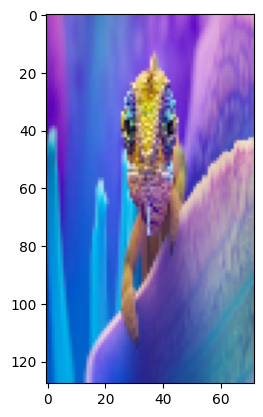

In [ ]:
import cv2
img_data = cv2.imread(img)
img_data = cv2.resize(img_data, (int(img_data.shape[0]/10), int(img_data.shape[1]/10)))
img_data.shape
plt.imshow(img_data)

In [ ]:
x = torch.tensor(img_data).view(img_data.shape[0], -1).float()
x.shape

torch.Size([128, 216])

In [ ]:
x

tensor([[168.,  65., 193.,  ..., 226., 174., 206.],
        [163.,  63., 191.,  ..., 222., 163., 204.],
        [162.,  61., 192.,  ..., 215., 151., 205.],
        ...,
        [  2.,  88., 197.,  ...,  97., 145., 178.],
        [  2.,  88., 197.,  ..., 106., 145., 184.],
        [  2.,  88., 197.,  ..., 116., 145., 188.]])

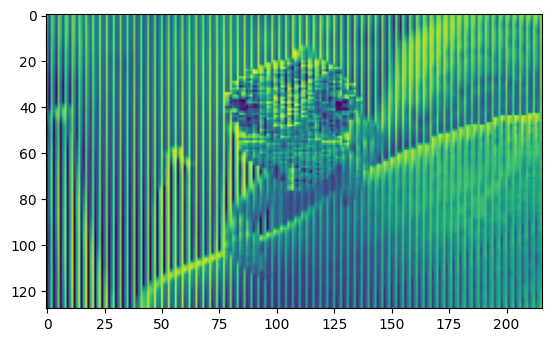

In [ ]:
plt.imshow(x)

In [ ]:
W1 = torch.randn((x.shape[1], 100), requires_grad=True)
B1 = torch.randn(100, requires_grad=True)
W2 = torch.randn((100, x.shape[1]), requires_grad=True)
B2 = torch.randn(x.shape[1], requires_grad=True)
W3 = torch.randn((x.shape[1], 200), requires_grad=True)
B3 = torch.randn(200, requires_grad=True)
W4 = torch.randn((200, x.shape[1]), requires_grad=True)
B4 = torch.randn(x.shape[1], requires_grad=True)

In [ ]:
stage1 = x@W1+B1
stage2 = stage1.tanh()
stage3 = stage2@W2+B2
stage4 = stage3.tanh()
mid1 = stage4 + x
stage5 = mid1@W3+B3
stage6 = stage5.tanh()
logits = stage6@W4+B4

In [ ]:
logits

tensor([[ 12.9035,  24.4896,  10.7176,  ...,  -8.9420, -13.4389,  -2.4982],
        [ 12.1813,  24.6255,  12.6451,  ...,  -6.1127, -11.4692,  -0.7330],
        [ 11.8252,  23.1211,  13.7863,  ...,  -9.4148, -12.3213,  -3.4073],
        ...,
        [ 10.7673,   7.9930,  -4.5612,  ...,  11.4556,   7.7940,   5.0533],
        [ 13.6175,   7.3651,  -0.9643,  ...,   8.5303,   4.2140,   3.9703],
        [ 12.1386,   6.7015,  -4.6580,  ...,   8.1717,   1.1669,   0.3418]],
       grad_fn=<AddBackward0>)

In [ ]:
parameters = [W1, B1, W2, B2, W3, B3, W4, B4]
for p in parameters:
  p.requires_grad = True

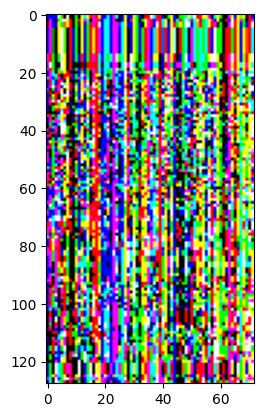

In [ ]:
stage1 = x@W1+B1
stage2 = stage1.tanh()
stage3 = stage2@W2+B2
stage4 = stage3.tanh()
stage5 = stage4@W3+B3
stage6 = stage5.tanh()
y = stage6@W4+B4
plt.imshow(y.view(y.shape[0], -1, 3).detach().numpy())

In [ ]:
losses = []

In [ ]:
fluctations = 0
rate = 1000
for z in range(1):
  loss = 1
  stage1 = x@W1+B1
  stage2 = stage1.tanh()
  stage3 = stage2@W2+B2
  stage4 = stage3.tanh()
  stage5 = stage4@W3+B3
  stage6 = stage5.tanh()
  logits = stage6@W4+B4
  for i in range(len(x)):
    for j in range(len(x[i])):
      loss += (logits[i][j]-x[i][j])**2
  loss = loss.log()
  if len(losses) > 2 and loss.item() > losses[-1]:
    fluctations += 1
  if fluctations == 10:
    fluctations = 0
    rate /= 10
  print(f"Starting run {z} {loss.item()} {loss.item() < losses[-1] if len(losses) > 2 else False}")
  for p in parameters:
    p.grad = None
  loss.backward()
  losses.append(loss.item())
  for p in parameters:
    p.data += -1 * rate * p.grad

Starting run 0 17.615802764892578 False


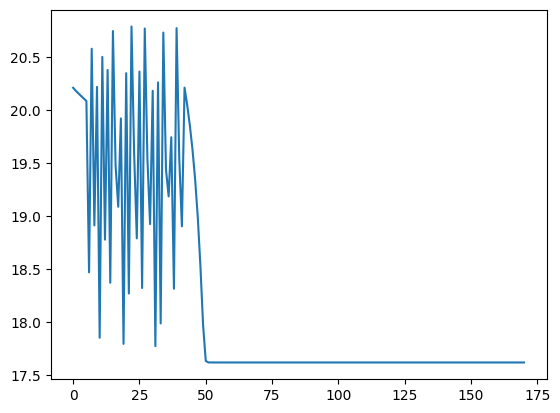

In [ ]:
plt.plot(losses)

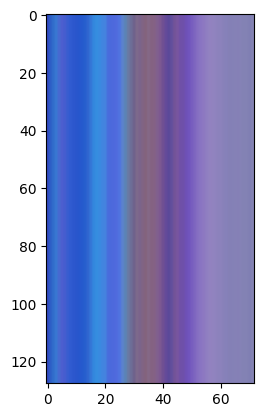

In [ ]:
stage1 = x@W1+B1
stage2 = stage1.tanh()
stage3 = stage2@W2+B2
stage4 = stage3.tanh()
stage5 = stage4@W3+B3
stage6 = stage5.tanh()
y = stage6@W4+B4
plt.imshow(y.view(y.shape[0], -1, 3).int().detach().numpy())

In [ ]:
for p in parameters:
  print(p.grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -6.7954e-17,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e

In [ ]:
print(x - logits)

tensor([[117.0000,  -7.8828,  -0.4531,  ...,  92.9609,  41.1875,  26.0234],
        [112.0000,  -9.8828,  -2.4531,  ...,  88.9609,  30.1875,  24.0234],
        [111.0000, -11.8828,  -1.4531,  ...,  81.9609,  18.1875,  25.0234],
        ...,
        [-49.0000,  15.1172,   3.5469,  ..., -36.0391,  12.1875,  -1.9766],
        [-49.0000,  15.1172,   3.5469,  ..., -27.0391,  12.1875,   4.0234],
        [-49.0000,  15.1172,   3.5469,  ..., -17.0391,  12.1875,   8.0234]],
       grad_fn=<SubBackward0>)


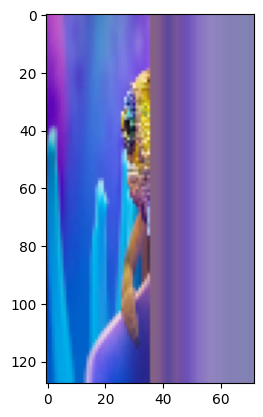

In [ ]:
logits[:,0:108] = x[:,0:108]
plt.imshow(logits.view(logits.shape[0], -1, 3).int().detach().numpy())